In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC, SVR
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from IPython.display import Image
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# SVM

## 1. Czym są SVM i zasada działania algorytmu
## 2. Co to jest Kernel ? 
## 3. Problem klasyfikacji wielu klas
## 4. Hiperparametry modelu
***************

# 1. SVM
## Suport Vector Machines 
## Maszyny wektorów wspornych (nośnych) 

Metoda uczeni maszynowego opracowana w AT&T Bell Laboratories przez Vladimira Vapnika z kolegami w latach 90.

Sprowadza się do odpowiedzi na pytanie: jak rozdzielić dwie kategorie używając prostej linii ? 

In [2]:
data = pd.DataFrame({'Kolor': ['CZ', 'CZ', 'CZ', 'CZ', 'CZ', 'CZ', 'CZ', 'CZ', 'CZ', 'CZ', 'NI', 'NI', 'NI', 'NI', 'NI', 'NI', 'NI', 'NI', 'NI', 'NI', 'NI'],
                     'X': [2, 4, 3.5, 4.2, 1, 4.7, 2.4, 1.7, 2.3, 3.7, 5.6, 7, 9.9, 6.8, 5.5, 8.4, 7.2, 6.1, 9, 8.2, 7.9],
                     'Y': [1, 2.3, 2, 1.5, 3, 4.8, 2.3, 3.5, 4.6, .9, 10, 8.8, 6.6, 6.8, 7.9, 5.3, 6, 8.7, 9.5, 6.6, 9]})

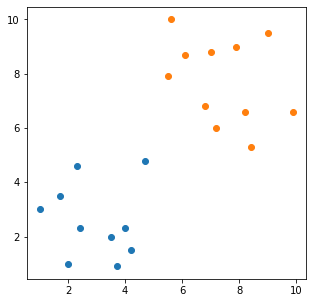

In [3]:
plt.figure(figsize=(5,5));
plt.scatter(data[data['Kolor'] =='CZ']['X'], data[data['Kolor'] =='CZ']['Y']);
plt.scatter(data[data['Kolor'] =='NI']['X'], data[data['Kolor'] =='NI']['Y']);

Linii rozdzielających dane jak powyżej możemy wyznaczy wiele, w SVM chodzi o to by wybrać tą optymalną.

Znajdujemy taką linię, by "margin" (odległość między linią klasyfikacji a najbliższymi jej obserwacjami ) było jak największe. 

Obserwacje leżące najbliżej linii klasyfikacji nazywane są "support vectors" 

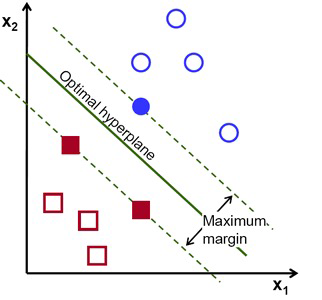

In [4]:
Image("img/svm_margin.png", width=500)

Gdyby usunąć ze zbioru wszystkie obserwacje poza support vetors to klasyfikator byłby taki sam. Więc dla tego algorytmu istotne są jedynie obserwacje graniczne. Poniżej przestawimy przykład pokazujący to zjawisko. 
Zatem SVM nie jest tak podatny na outleiery. 

Zatem widzimy tutaj znaczą różncę względem regresji logistycznej.
Ponadto w przypadku SVM otrzymujemy wynik po porstu jako przynależność do klasy, nie mamy tutaj interpretacji probabilistycznej wyniku  

Ponadto w przeciwieństwie do regresji logistycznej SVM jest metodą nieparametryczną tzn. nie szukamy tutaj parametrów (wag) dla zmiennych lecz na podstawie zbioru danych będziemy szukać optymalnego podziału klas. 

**********

In [50]:
# mapowanie etykiet, tak byśmy potem mogli skorzystać z rysowania wykresów decyzyjnych plot_decision_regions
encoder = LabelEncoder()
data['Kolor'] = encoder.fit_transform(data['Kolor'])

In [51]:
data['Kolor']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
Name: Kolor, dtype: int64

In [52]:
# uczenie modelu stadarodow jak innych w pakiecie sklearn
# wybieramy kernel liniowy by pokazać podział linią prostą - o krenelach będzie w dalszej części 
simple_svm = SVC(kernel='linear')
simple_svm.fit(data[['X', 'Y']], data['Kolor']);

C:\Users\karol\AppData\Local\Temp\ipykernel_15228\1299742533.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plot_decision_regions(X = data[['X', 'Y']].to_numpy(), y = data['Kolor'].to_numpy().astype(np.int), clf=simple_svm);
C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


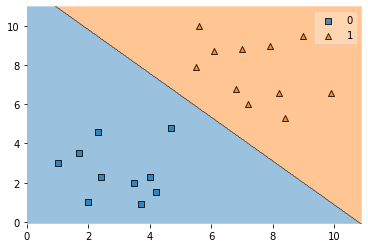

In [7]:
# rysowanie wykresu decyzyjności na przetrzeni 
plot_decision_regions(X = data[['X', 'Y']].to_numpy(), y = data['Kolor'].to_numpy().astype(np.int), clf=simple_svm);

C:\Users\karol\AppData\Local\Temp\ipykernel_15228\3501806290.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plot_decision_regions(X = data2[['X', 'Y']].to_numpy(), y = data2['Kolor'].to_numpy().astype(np.int), clf=simple_svm2);
C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


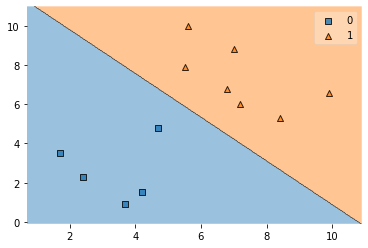

In [8]:
data2 = pd.DataFrame({'Kolor': [  'CZ',  'CZ', 'CZ', 'CZ', 'CZ', 'NI', 'NI', 'NI', 'NI', 'NI', 'NI', 'NI'],
                     'X': [ 4.2,  4.7, 2.4, 1.7,  3.7, 5.6, 7, 9.9, 6.8, 5.5, 8.4, 7.2],
                     'Y': [   1.5, 4.8, 2.3, 3.5, .9, 10, 8.8, 6.6, 6.8, 7.9, 5.3, 6]})

data2['Kolor'] = LabelEncoder().fit_transform(data2['Kolor'])
simple_svm2 = SVC(kernel='linear').fit(data2[['X', 'Y']], data2['Kolor'])
plot_decision_regions(X = data2[['X', 'Y']].to_numpy(), y = data2['Kolor'].to_numpy().astype(np.int), clf=simple_svm2);


## Jak wygląda klasyfikator w przestrzeni ? 

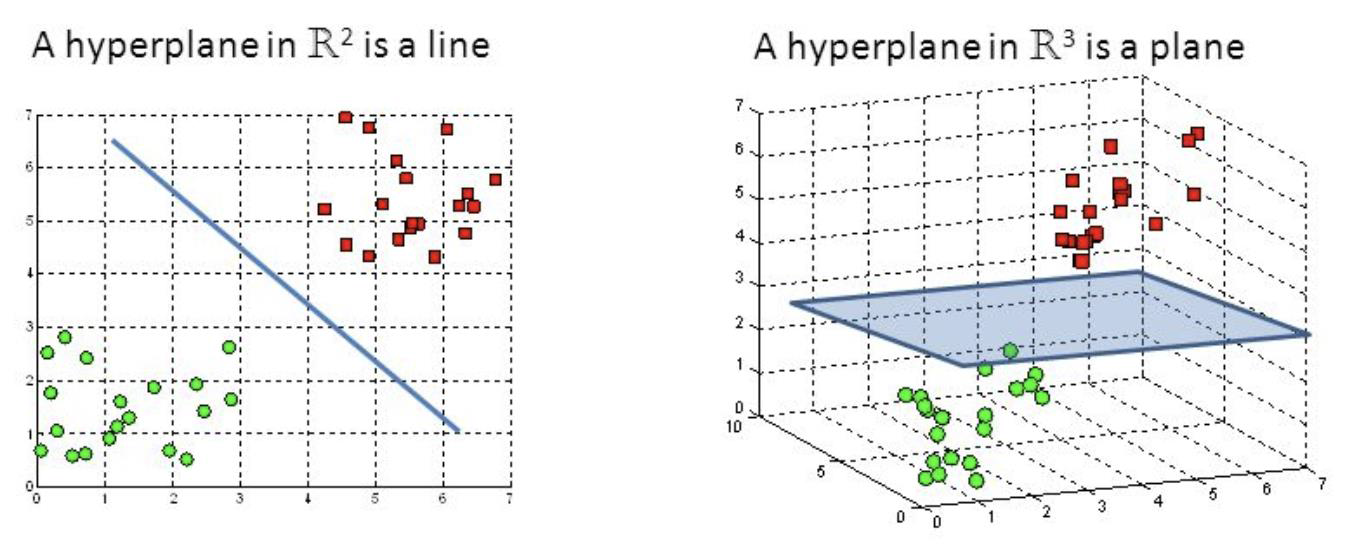

In [9]:
Image("img/hiperpłaszczyzna.png", width=850)

## Miękki margines

Dotychczas przedstawiany był twardy margines, tj. żaden punkt w zbiorze treningowym nie znajdował się między liniami wyznaczonymi przez wektory wspierające.
Jest to kontrolowane przez parametr
C (o hiperparametrach w daszej części).

Punkty wewnątrz marginesu uważamy za potencjalnie błędnie zaklasyfikowane

*********

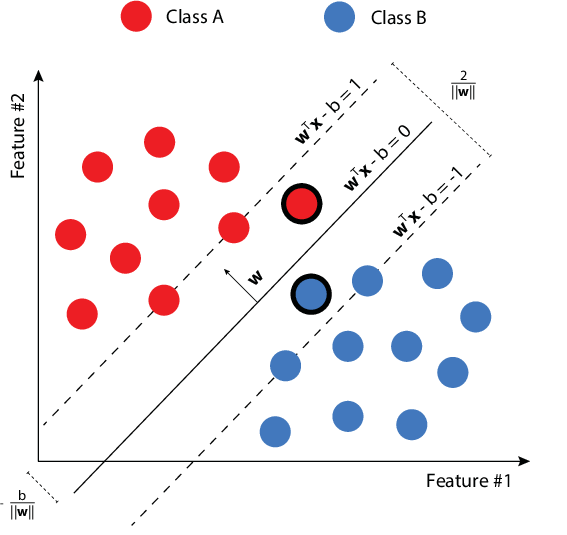

In [10]:
Image("img/soft_margin.png", width=600)

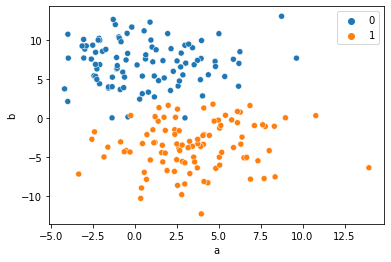

In [49]:
## w pakiecie dataset mamy wiele funkcji do generowania różnych struktur danych 
df = datasets.make_blobs(n_samples=200, random_state=67, centers=2,cluster_std=3)
X = pd.DataFrame(df[0], columns=['a', 'b'])
y = df[1]
sns.scatterplot(data= X, x=X.a, y=X.b, hue = y);

C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


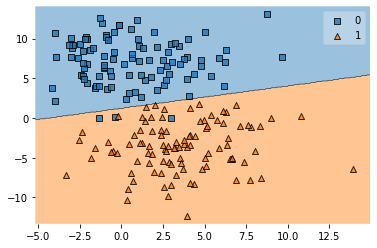

In [12]:
svm = SVC(kernel='linear').fit(X, y)
plot_decision_regions(X = X.to_numpy(), y = y, clf=svm);

## SVM dla regresji

Zasadę działania SMV możemy również zasosować w problemach regresji. Działanie to jest mniej intuicyjne niż w przypadku klasyfikacji ale zasada również polega na tym, że będzimy chcieli zminimalizować błąd przez znalezienie takiej hiperpłaszczyzy dla któej margines będzie największy. W praktyce chodzi o to by otrzymana linia regresji zawierała jak najwięcej punktów w jak najbliższej odlegości od niej.
*****


In [13]:
df = pd.read_csv("data/Advertising.csv")
df = df.drop("Unnamed: 0", axis=1)
X = df['TV']
y = df['Sales']
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


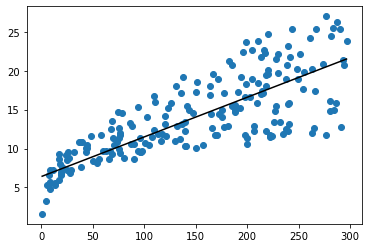

In [14]:
srv_reg = SVR(kernel='linear').fit(X.to_numpy().reshape(-1,1), y)

def reg(x):
    y = srv_reg.predict(x)
    return y

xs = np.arange(min(X),max(X),0.01)
plt.plot(xs,reg(xs.reshape(-1,1)),color="black");
plt.scatter(X,y);

# 2.Kernel

## Mapowanie do wyższych wymiarów

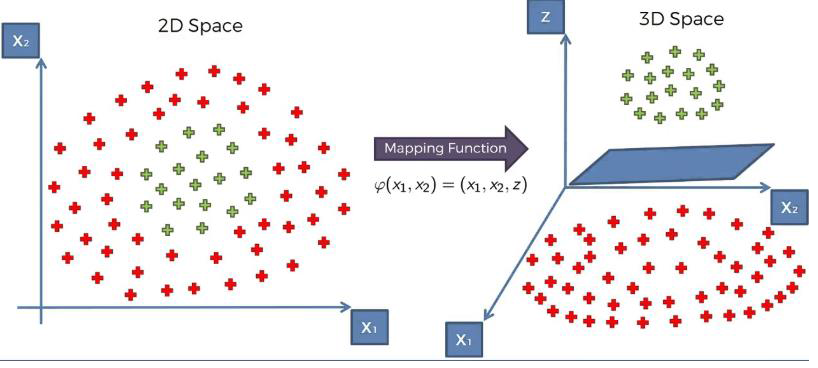

In [15]:
Image("img/mapowanie3d.png", width=800)

## Jak łatwo odseparować od siebie klasy, które wydają się być nie do odseparowania?
## Przykład liniowy

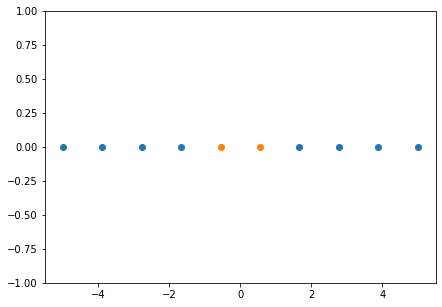

In [16]:
X = np.linspace(-5, 5, 10)
y = np.zeros(10)
labs = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])
plt.figure(figsize=(7,5))
plt.scatter(X[labs!=1], y[labs!=1])
plt.scatter(X[labs==1], y[labs==1])
plt.ylim(bottom=-1, top=1);

### Sprowadzenie do wyższego wymiaru przez podniesienie od kwadratu

In [17]:
x_sq = X**2

In [53]:
x_sq

array([25.        , 15.12345679,  7.71604938,  2.77777778,  0.30864198,
        0.30864198,  2.77777778,  7.71604938, 15.12345679, 25.        ])

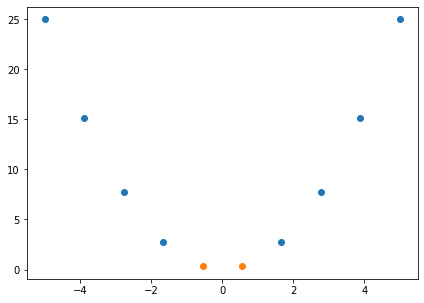

In [18]:
plt.figure(figsize=(7,5))
plt.scatter(X[labs!=1], x_sq[labs!=1])
plt.scatter(X[labs==1], x_sq[labs==1]);

## Teraz możemy łatwo rozdzielić klasy linią prostą  

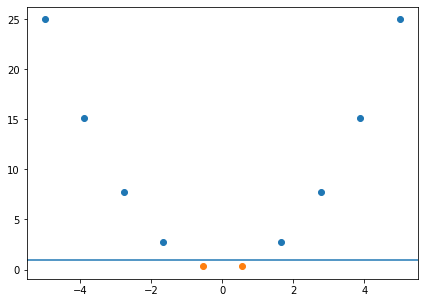

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(X[labs!=1], x_sq[labs!=1])
plt.scatter(X[labs==1], x_sq[labs==1])
plt.axhline(y=1, );

## Kernel (Jądro) jest to funkcja matematyczna przekształcająca przestrzeń obserwacji. Dzięi stosowaniu różnych funkcji możemy przekształcić problemy nieliniowe w liniowo separowalne.

Maszyna wektorów nośnych klasyfikuje dane wykorzystując niejawne przekształcenie zbioru treningowego do przestrzeni cech wyższego wymiaru. W nowej przestrzeni cech dopasowywana jest optymalna hiperpłaszczyzna

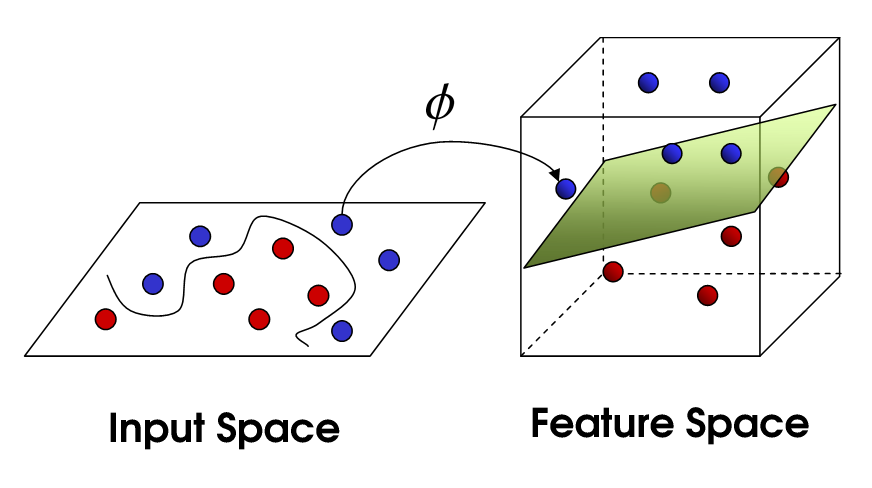

In [20]:
Image("img/kernel.png", width=600)

# Typy kerneli - przykłady na różnych strukturach danych 

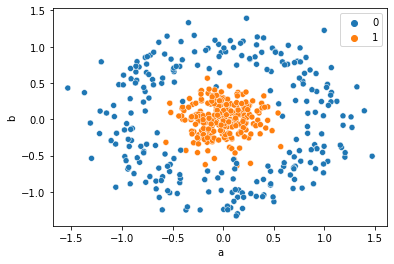

In [46]:
df = datasets.make_circles(n_samples=500,random_state=0, noise =.2, factor=.1)
X = pd.DataFrame(df[0], columns=['a', 'b'])
y = df[1]
sns.scatterplot(data= X, x=X.a, y=X.b, hue = y);

## Liniowy (linear)


C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


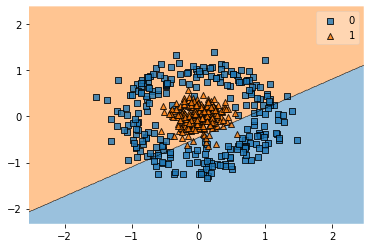

In [22]:
lin_svm = SVC(kernel='linear',gamma = 'scale')
lin_svm.fit(X,y)
plot_decision_regions(X.to_numpy(),y, clf=lin_svm);

## Wilomianowy (poly)

### Degree = 2

C:\Users\karol\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


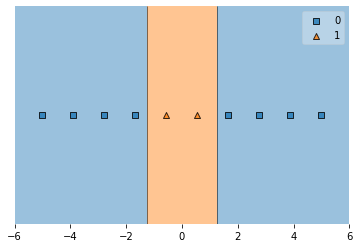

In [82]:
#przyklad z zajec
lin_svm = SVC(kernel='poly', degree=2, C=5)
lin_svm.fit(np.linspace(-5, 5, 10).reshape(-1, 1),labs.reshape(-1, 1))
plot_decision_regions(np.linspace(-5, 5, 10).reshape(-1, 1),labs, clf=lin_svm);

C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


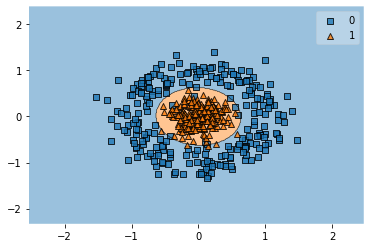

In [23]:
svm_poly2 = SVC(kernel='poly', degree=2,gamma = 'scale').fit(X,y)
plot_decision_regions(X.to_numpy(),y, clf=svm_poly2);

### Degree = 3

C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


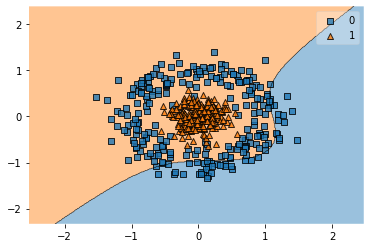

In [24]:
svm_poly3 = SVC(kernel='poly', degree=3,gamma = 'scale').fit(X,y)
plot_decision_regions(X.to_numpy(),y, clf=svm_poly3);

## Radial (rbf)

C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


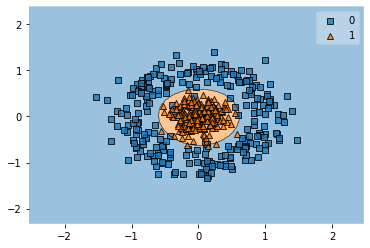

In [25]:
svm_rad = SVC(kernel='rbf',gamma = 'scale').fit(X,y) #radial basis function
plot_decision_regions(X.to_numpy(),y, clf=svm_rad);

## Zadanie 1. 

Dla zbioru danych pniżej stwórz modele SVM z kernelem liniowym, radial i polynominal w kilku wariantach stopni wielomianu.
Narysuj wykresy oraz policz skuteczność modeli. Który był najskuteczniejszy ? 

C:\Users\karol\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


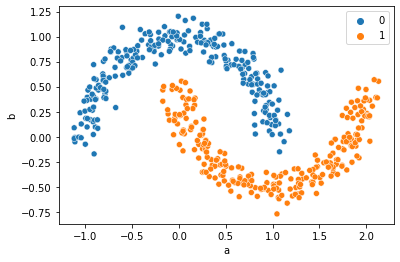

In [84]:
df = datasets.make_moons(n_samples=500, random_state=0, noise = .09)
X = pd.DataFrame(df[0], columns=['a', 'b'])
y = df[1]
sns.scatterplot(X.a, X.b, hue = y);

C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


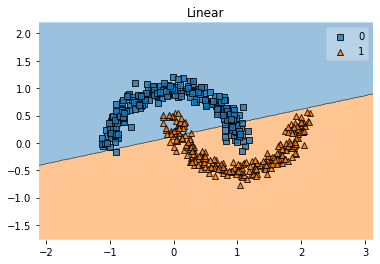

Linear accuracy: 0.878


C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


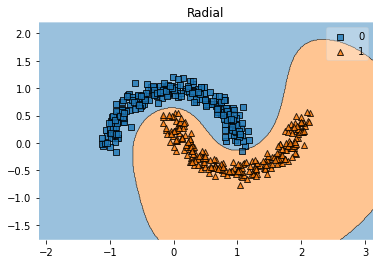

Radial accuracy: 0.998


C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


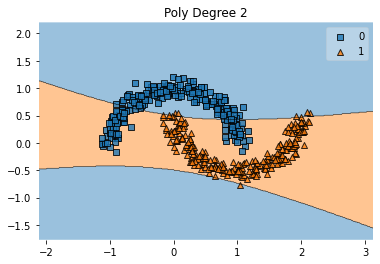

Poly degree 2 accuracy: 0.802


C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


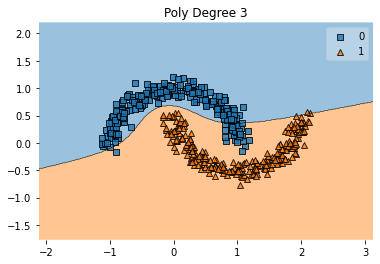

Poly degree 3 accuracy: 0.936


C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


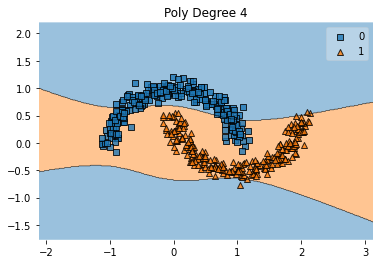

Poly degree 4 accuracy: 0.804


C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


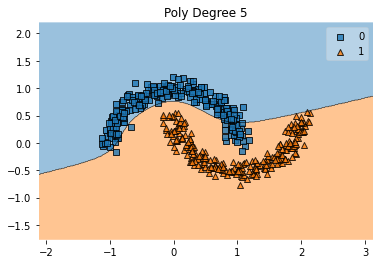

Poly degree 5 accuracy: 0.936


C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


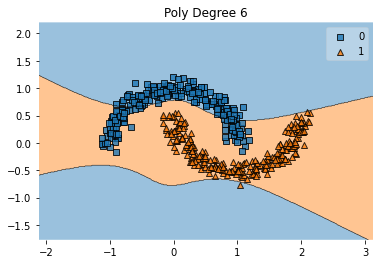

Poly degree 6 accuracy: 0.81


C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


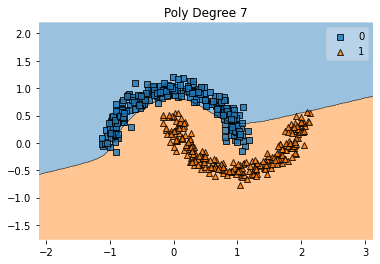

Poly degree 7 accuracy: 0.928


C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


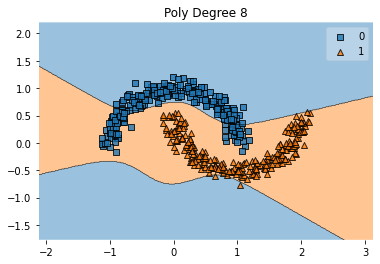

Poly degree 8 accuracy: 0.832


C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


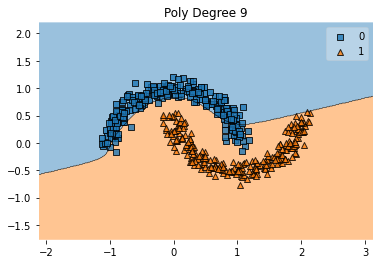

Poly degree 9 accuracy: 0.922


In [85]:

svm_rbf = SVC(kernel='linear',gamma = 'scale').fit(X,y)
fig = plot_decision_regions(X.to_numpy(),y, clf=svm_rbf)
plt.title('Linear')
plt.show()
print('Linear accuracy: {0}'.format(accuracy_score(svm_rbf.predict(X),y)))


svm_rbf = SVC(kernel='rbf',gamma = 'scale').fit(X,y)
fig = plot_decision_regions(X.to_numpy(),y, clf=svm_rbf)
plt.title('Radial')
plt.show()
print('Radial accuracy: {0}'.format(accuracy_score(svm_rbf.predict(X),y)))


for d in range(2,10):
    svm_poly = SVC(kernel='poly', degree=d,gamma = 'scale').fit(X,y)
    fig = plot_decision_regions(X.to_numpy(),y, clf=svm_poly)
    plt.title('Poly Degree {0}'.format(d))
    plt.show()
    print('Poly degree {0} accuracy: {1}'.format(d,accuracy_score(svm_poly.predict(X),y)))

# 3. Problem klasyfikacji wielu klas

SVM jest klasyfikatorem binarnym. Możemy jednak zastosować techniki trenowania wielu klasyfikatorów i łączenia ich w celu uzyskania złożnoego modelu obsługującego wiele klas.

Są dwa główne podejścia:
- one vs one (stosowany domyślnie w sklearn)
- one vs all (aby go użyć należy posłużyć się modelem ```sklearn.multiclass.OneVsRestClassifier```)

W pierwszym podejściu budujemy klasyfikatory dla wszystkich możliwych par klas. Jest to z reguły skuteczniejsza metoda lecz złożoność obliczeniowa rośnie nam wykładniczo wraz ze wzrostem liczby klas. 
W drugim podejściu budujemy jden klasyfikator dla każdej klasy. 
*******

C:\Users\karol\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


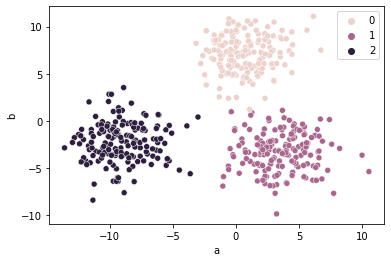

In [89]:
df = datasets.make_blobs(n_samples=500, random_state=67, centers=3,cluster_std=2)
# print(df)
X = pd.DataFrame(df[0], columns=['a', 'b'])
y = df[1]
sns.scatterplot(X.a, X.b, hue = y);

In [87]:
X

,a,b
0,6.453625,-0.908871
1,-11.341607,-8.409580
2,-10.515416,-2.950854
3,-10.157460,-0.333461
4,3.815622,0.327802
...,...,...
495,0.558448,6.878821
496,-0.347191,8.360937
497,-8.023069,-0.211560
498,2.518922,9.020914


In [91]:
y

array([1, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 1,
       1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0,
       2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0,
       2, 0, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0,
       2, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 1, 0,
       2, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 0, 1, 2,
       1, 0, 0, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0,
       1, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0,
       0, 0, 2, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 1,

C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


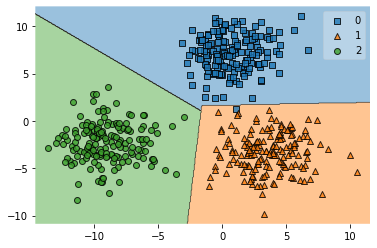

In [93]:
lin_ovo = SVC(kernel='linear')
lin_ovo.fit(X,y)
plot_decision_regions(X.to_numpy(),y, clf=lin_ovo);

C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


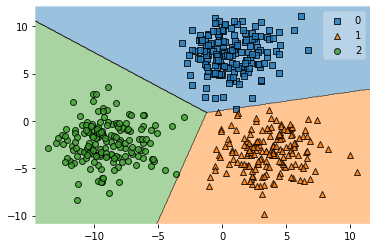

In [29]:
lin_ovr = OneVsRestClassifier(SVC(kernel='linear')).fit(X,y)
plot_decision_regions(X.to_numpy(),y, clf=lin_ovr);

# 4. Hiperparmetry

Hiperparamerami nazywamy takie parametry, które definiujemy jeszcze przed rozpoczęciem trenowania. Hiperparametry nie są wyliczane przez algorytm podczas uczenia tak jak np wagi w modelu regresji liniowej. Hiperpaarametry decydują zwykle o tym w jaki sposób ma działać model jakiego rodzaju obliczenia czy przekształecenia ma zastosować, ile iteracji ma wykonać itd. 

## Regularyzacja (C)

Określa jak bardzo chcemy uniknać złego sklasyfikowania obserwacji. 
Jeżeli C jest duże, wówczas algorytm dobierze węższe marginesy. Dopasowanie będzie lesze ale możemy mieć prblem z overfttingiem.


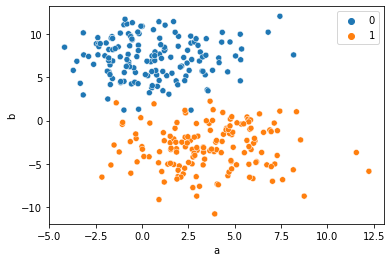

In [94]:
df = datasets.make_blobs(n_samples=300, random_state=67, centers=2,cluster_std=2.5)
X = pd.DataFrame(df[0], columns=['a', 'b'])
y = df[1]
sns.scatterplot(data= X, x=X.a, y=X.b, hue = y);

C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


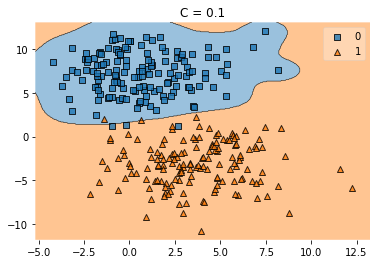

In [31]:
svm = SVC(kernel='rbf',gamma='auto',C=0.1)
svm.fit(X,y)
plt.title('C = 0.1')
plot_decision_regions(X.to_numpy(),y, clf=svm);

C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


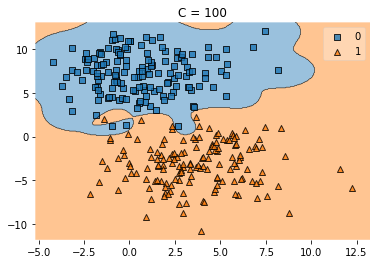

In [32]:
svm = SVC(kernel='rbf',gamma='auto',C=100)
svm.fit(X,y)
plt.title('C = 100')
plot_decision_regions(X.to_numpy(),y, clf=svm);

## Gamma $\gamma$

Parametr dla kerneli typu radial, poly i sigmoiod. Określa ile oberwacji będzie miało wpływ na na hiperpłaszczyznę.
Wysoka wartość parametru oznacza, że tylko kilka punktów będzie miało wpły na podział, więc przestrzeń będzie można "łatwiej wygiąć" 

Możemy też, skorzystać z wartości 'auto' oraz 'scale' - wtedy w zależności od zbioru danych algorytm dobierze nam odpowiednią wartość parametru.
Dokumentacja: 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


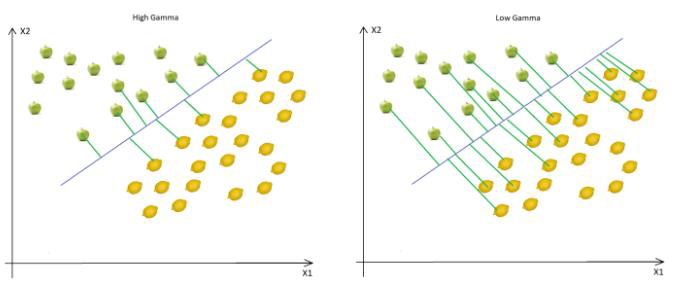

In [33]:
Image("img/gamma.png", width=700)

C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


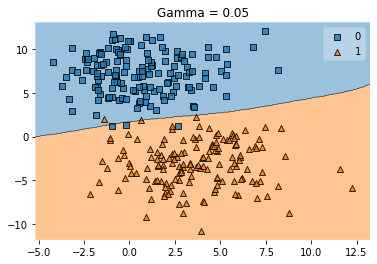

In [34]:
svm = SVC(kernel='rbf',gamma=0.05)
svm.fit(X,y)
plt.title('Gamma = 0.05')
plot_decision_regions(X.to_numpy(),y, clf=svm);

C:\Users\karol\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


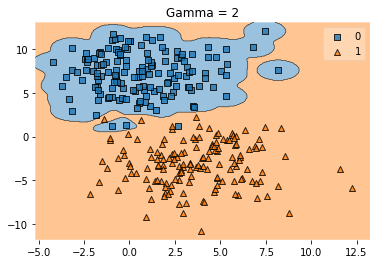

In [35]:
svm = SVC(kernel='rbf',gamma=2)
svm.fit(X,y)
plt.title('Gamma = 2')
plot_decision_regions(X.to_numpy(),y, clf=svm);

## Zastosowanie w klasyfikacji obrazów

SVM ze względu na swoją dobrą skuteczność w rozwiązywaniu problemów nieliniowych swojego czasu był wykorzystywany w problemach związanych z klasyfikacją obrazów.

In [36]:
mnist = pd.read_csv('data/mnist_test.csv')
## bieżemy tylko pierwsze 2000 obseracji żeby szybciej się liczyło
mnist = mnist.iloc[0:2000]

Y = mnist['label']
X = mnist.drop(columns = 'label').to_numpy()
print(len(X[0]))
print(X[0])

784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 198 198 198 198 198 198 170  5

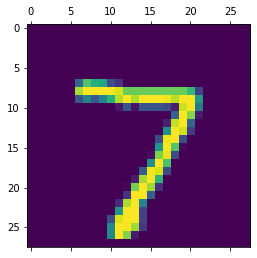

In [37]:
plt.matshow(X[0].reshape(28,28));

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3,random_state=50)

In [39]:
## regresja
lin = LogisticRegression().fit(X_train,Y_train)
pred = lin.predict(X_test)
print('Accuracy:',accuracy_score(Y_test,pred))

Accuracy: 0.8433333333333334


C:\Users\karol\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
# SVM
svm = SVC(kernel='poly',gamma='auto',degree=3).fit(X_train,Y_train)
pred = svm.predict(X_test)
print('Accuracy:',accuracy_score(Y_test,pred))

Accuracy: 0.89


In [41]:
confusion_matrix(Y_test,pred)

array([[48,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 68,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 3,  1, 58,  0,  1,  0,  0,  2,  1,  1],
       [ 0,  4,  0, 51,  0,  2,  1,  6,  2,  0],
       [ 1,  0,  0,  0, 71,  0,  0,  1,  0,  1],
       [ 0,  1,  0,  0,  2, 49,  1,  0,  0,  0],
       [ 5,  1,  0,  0,  2,  0, 43,  0,  1,  0],
       [ 0,  0,  1,  0,  3,  0,  0, 49,  0,  4],
       [ 0,  1,  0,  2,  1,  0,  0,  1, 48,  0],
       [ 0,  1,  0,  1,  4,  0,  0,  3,  1, 49]], dtype=int64)

### Gridsearch na zbiorze danych breast cancer

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [104]:
df_feat = pd.DataFrame(cancer['data'],columns = cancer['feature_names'])
df_target = pd.DataFrame(cancer['target'],columns =['Cancer'])
print("Feature Variables: ")
print(df_feat.info())

Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smooth

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target),test_size = 0.30, random_state = 101)

In [106]:
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [108]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.633 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.2s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.613 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [109]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



## Zadanie 2

Zbiór mnist (pierwszych 2000 obserwacji) podziel na zbiory: treningowy walidacyjny, testowy w stosunku 60%, 20% 20%. 

train-test-split na 80/20 i potem cv=4

Następnie spróbuj znaleźć najlepszy model SVM. Przetestuj różne kernele i ich hiperparametry (C, gamma) sprawdzając skuteczność (accuracy score) na zbiorze walidacyjnym.
Wybierz najlepszy model i na końcu policz skuteczność tego modelu na zbiorze testowym 
